<a href="https://colab.research.google.com/github/bismaats/exercises_da/blob/main/Exercise_2_Mentoring_DA_7_Grup_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set()

## Hotel Booking Demand Dataset


### Source
Antonio, N., de Almeida, A. and Nunes, L. (2019) “Hotel booking demand datasets,” Data in Brief, 22, pp. 41–49. Available at: https://doi.org/10.1016/j.dib.2018.11.126. 

Downloaded and cleaned data: [tidytuesday](https://github.com/rfordatascience/tidytuesday/tree/master/data/2020/2020-02-11)


### Data Dictionary

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
|hotel                          |character | Hotel (H1 = Resort Hotel or H2 = City Hotel) |
|is_canceled                    |double    | Value indicating if the booking was canceled (1) or not (0) |
|lead_time                      |double    | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date |
|arrival_date_year              |double    | Year of arrival date|
|arrival_date_month             |character | Month of arrival date|
|arrival_date_week_number       |double    | Week number of year for arrival date|
|arrival_date_day_of_month      |double    | Day of arrival date|
|stays_in_weekend_nights        |double    | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel |
|stays_in_week_nights           |double    |  Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel|
|adults                         |double    | Number of adults|
|children                       |double    | Number of children|
|babies                         |double    |Number of babies |
|meal                           |character | Type of meal booked. Categories are presented in standard hospitality meal packages: <br> Undefined/SC – no meal package;<br>BB – Bed & Breakfast; <br> HB – Half board (breakfast and one other meal – usually dinner); <br> FB – Full board (breakfast, lunch and dinner) |
|country                        |character | Country of origin. Categories are represented in the ISO 3155–3:2013 format |
|market_segment                 |character | Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
|distribution_channel           |character | Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
|is_repeated_guest              |double    | Value indicating if the booking name was from a repeated guest (1) or not (0) |
|previous_cancellations         |double    | Number of previous bookings that were cancelled by the customer prior to the current booking |
|previous_bookings_not_canceled |double    | Number of previous bookings not cancelled by the customer prior to the current booking |
|reserved_room_type             |character | Code of room type reserved. Code is presented instead of designation for anonymity reasons |
|assigned_room_type             |character | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons |
|booking_changes                |double    | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation|
|deposit_type                   |character | Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:<br>No Deposit – no deposit was made;<br>Non Refund – a deposit was made in the value of the total stay cost;<br>Refundable – a deposit was made with a value under the total cost of stay. |
|agent                          |character | ID of the travel agency that made the booking |
|company                        |character | ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons |
|days_in_waiting_list           |double    | Number of days the booking was in the waiting list before it was confirmed to the customer |
|customer_type                  |character | Type of booking, assuming one of four categories:<br>Contract - when the booking has an allotment or other type of contract associated to it;<br>Group – when the booking is associated to a group;<br>Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;<br>Transient-party – when the booking is transient, but is associated to at least other transient booking|
|adr                            |double    | Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights |
|required_car_parking_spaces    |double    | Number of car parking spaces required by the customer |
|total_of_special_requests      |double    | Number of special requests made by the customer (e.g. twin bed or high floor)|
|reservation_status             |character | Reservation last status, assuming one of three categories:<br>Canceled – booking was canceled by the customer;<br>Check-Out – customer has checked in but already departed;<br>No-Show – customer did not check-in and did inform the hotel of the reason why |
|reservation_status_date        |double    | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel|

In [ ]:
df_hotels = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-11/hotels.csv')
df_hotels.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df_hotels.iloc[0]

hotel                             Resort Hotel
is_canceled                                  0
lead_time                                  342
arrival_date_year                         2015
arrival_date_month                        July
arrival_date_week_number                    27
arrival_date_day_of_month                    1
stays_in_weekend_nights                      0
stays_in_week_nights                         0
adults                                       2
children                                   0.0
babies                                       0
meal                                        BB
country                                    PRT
market_segment                          Direct
distribution_channel                    Direct
is_repeated_guest                            0
previous_cancellations                       0
previous_bookings_not_canceled               0
reserved_room_type                           C
assigned_room_type                           C
booking_chang

Di dataset ini tidak terdapat kolom unique identifier, sehingga untuk latihan ini kita akan menganggap bahwa jika setiap row adalah unik dengan memberikan kolom `id` sebagai unique identifier.

In [ ]:
df_hotels.reset_index()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,119385,City Hotel,0,23,2017,August,35,30,2,5,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,119386,City Hotel,0,102,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,119387,City Hotel,0,34,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,119388,City Hotel,0,109,2017,August,35,31,2,5,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
df_hotels = df_hotels.reset_index().rename(columns={'index':'id'})
df_hotels.head()

,id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Cek kolom

In [ ]:
df_hotels.columns

Index(['id', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Cek data type

`dtypes` adalah atribut untuk dataframe

`dtype` adalah atribut untuk Series

In [ ]:
type(df_hotels)

pandas.core.frame.DataFrame

In [ ]:
df_hotels.dtypes

id                                  int64
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                      

In [ ]:
sebuah_df = pd.DataFrame([0,2,3], columns=['sebuah kolom'])
sebuah_df

,sebuah kolom
0,0
1,2
2,3


In [ ]:
sebuah_df.sebuah kolom

SyntaxError: ignored

In [ ]:
sebuah_df['sebuah kolom']

0    0
1    2
2    3
Name: sebuah kolom, dtype: int64

In [ ]:
type(sebuah_df['sebuah kolom'])

pandas.core.series.Series

In [ ]:
df_hotels['hotel']

0         Resort Hotel
1         Resort Hotel
2         Resort Hotel
3         Resort Hotel
4         Resort Hotel
              ...     
119385      City Hotel
119386      City Hotel
119387      City Hotel
119388      City Hotel
119389      City Hotel
Name: hotel, Length: 119390, dtype: object

In [ ]:
df_hotels.hotel.dtype

dtype('O')

Cek jumlah NULL value

In [ ]:
df_hotels.isna().head()

,id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
# berapa banyak sih kolom yang isinya NULL di baris dengan index tertentu
df_hotels.isna().sum(axis=1)

0         2
1         2
2         2
3         1
4         1
         ..
119385    1
119386    1
119387    1
119388    1
119389    1
Length: 119390, dtype: int64

In [ ]:
# baris dengan index 119388 memiliki 1 kolom yg isinya NULL (kolom company)
df_hotels.iloc[119388]

id                                    119388
hotel                             City Hotel
is_canceled                                0
lead_time                                109
arrival_date_year                       2017
arrival_date_month                    August
arrival_date_week_number                  35
arrival_date_day_of_month                 31
stays_in_weekend_nights                    2
stays_in_week_nights                       5
adults                                     2
children                                 0.0
babies                                     0
meal                                      BB
country                                  GBR
market_segment                     Online TA
distribution_channel                   TA/TO
is_repeated_guest                          0
previous_cancellations                     0
previous_bookings_not_canceled             0
reserved_room_type                         A
assigned_room_type                         A
booking_ch

ada 112593 baris yang isian kolom `company` nya NULL

In [ ]:
df_hotels.isna().sum(axis=0)

id                                     0
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent           

In [ ]:
df_hotels['company'].isna().sum()

112593

In [ ]:
df_hotels.company.isna().sum()

112593

In [ ]:
df_hotels.company.isna().sum() / len(df_hotels)

0.943068933746545

Cek jumlah unique value

In [ ]:
df_hotels.nunique(axis=0)

id                                119390
hotel                                  2
is_canceled                            2
lead_time                            479
arrival_date_year                      3
arrival_date_month                    12
arrival_date_week_number              53
arrival_date_day_of_month             31
stays_in_weekend_nights               17
stays_in_week_nights                  35
adults                                14
children                               5
babies                                 5
meal                                   5
country                              177
market_segment                         8
distribution_channel                   5
is_repeated_guest                      2
previous_cancellations                15
previous_bookings_not_canceled        73
reserved_room_type                    10
assigned_room_type                    12
booking_changes                       21
deposit_type                           3
agent           

In [ ]:
round(100*(df_hotels.isnull().sum()/len(df_hotels.index)),2)

id                                 0.00
hotel                              0.00
is_canceled                        0.00
lead_time                          0.00
arrival_date_year                  0.00
arrival_date_month                 0.00
arrival_date_week_number           0.00
arrival_date_day_of_month          0.00
stays_in_weekend_nights            0.00
stays_in_week_nights               0.00
adults                             0.00
children                           0.00
babies                             0.00
meal                               0.00
country                            0.41
market_segment                     0.00
distribution_channel               0.00
is_repeated_guest                  0.00
previous_cancellations             0.00
previous_bookings_not_canceled     0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
agent                             13.69


## Nomor 1 (Function)

Buatlah fungsi dengan :

*   1 argumen berupa dataframe untuk mengecek data type,
*   untuk mengecek jumlah null value,
*   untuk mengecek percent null value, 
*   serta jumlah unique value tiap kolom yang ada di sebuah dataframe

In [ ]:
i = 0
for col in df_hotels.columns:
  print(f'iterasi ke-{i+1}: {col}')

iterasi ke-1: id
iterasi ke-1: hotel
iterasi ke-1: is_canceled
iterasi ke-1: lead_time
iterasi ke-1: arrival_date_year
iterasi ke-1: arrival_date_month
iterasi ke-1: arrival_date_week_number
iterasi ke-1: arrival_date_day_of_month
iterasi ke-1: stays_in_weekend_nights
iterasi ke-1: stays_in_week_nights
iterasi ke-1: adults
iterasi ke-1: children
iterasi ke-1: babies
iterasi ke-1: meal
iterasi ke-1: country
iterasi ke-1: market_segment
iterasi ke-1: distribution_channel
iterasi ke-1: is_repeated_guest
iterasi ke-1: previous_cancellations
iterasi ke-1: previous_bookings_not_canceled
iterasi ke-1: reserved_room_type
iterasi ke-1: assigned_room_type
iterasi ke-1: booking_changes
iterasi ke-1: deposit_type
iterasi ke-1: agent
iterasi ke-1: company
iterasi ke-1: days_in_waiting_list
iterasi ke-1: customer_type
iterasi ke-1: adr
iterasi ke-1: required_car_parking_spaces
iterasi ke-1: total_of_special_requests
iterasi ke-1: reservation_status
iterasi ke-1: reservation_status_date


In [ ]:
df_hotels.columns

Index(['id', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df_hotels['hotel'].nunique()

2

In [ ]:
['hotel',
 df_hotels['hotel'].dtype, 
 df_hotels['hotel'].isna().sum(),
 round(df_hotels['hotel'].isna().sum() / len(df_hotels) * 100, 2),
 df_hotels['hotel'].nunique()]

['hotel', dtype('O'), 0, 0.0, 2]

In [ ]:
def check_values(df):
    data = []
    for col in df.columns:
        data.append([col, 
                     df[col].dtype, 
                     df[col].isna().sum(), 
                     round(100*(df[col].isna().sum()/len(df)),2), 
                     df[col].nunique()
                     ])
    return pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique'],data=data)

In [ ]:
check_values(df_hotels)

,dataFeatures,dataType,null,nullPct,unique
0,id,int64,0,0.00,119390
1,hotel,object,0,0.00,2
2,is_canceled,int64,0,0.00,2
3,lead_time,int64,0,0.00,479
4,arrival_date_year,int64,0,0.00,3
5,arrival_date_month,object,0,0.00,12
6,arrival_date_week_number,int64,0,0.00,53
7,arrival_date_day_of_month,int64,0,0.00,31
8,stays_in_weekend_nights,int64,0,0.00,17
9,stays_in_week_nights,int64,0,0.00,35


In [ ]:
df_hotels.head()

,id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Nomor 2 (Cancelled vs confirmed)
Ada berapa berapa jumlah pengunjung yang membatalkan reservasi dan yang tidak? Dan dari jumlah tersebut buatlah kesimpulan mengenai proporsisi masing-masing!

### List comprehension utk mencari nama kolom

In [ ]:
df_hotels.columns

Index(['id', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# jika dataset memiliki terlalu banyak kolom,
# kita bisa mencari nama kolom berdasarkan kata yang terkandung di nama kolom tsb
# lalu pakai list comprehension

# mencari nama kolom yang ada 'status' nya
[nama_kolom for nama_kolom in df_hotels.columns if 'status' in nama_kolom]

['reservation_status', 'reservation_status_date']

In [ ]:
# memanggil subset dari sebuah dataframe (hanya 2 kolom saja)
df_hotels[['reservation_status','reservation_status_date']]

,reservation_status,reservation_status_date
0,Check-Out,2015-07-01
1,Check-Out,2015-07-01
2,Check-Out,2015-07-02
3,Check-Out,2015-07-02
4,Check-Out,2015-07-03
...,...,...
119385,Check-Out,2017-09-06
119386,Check-Out,2017-09-07
119387,Check-Out,2017-09-07
119388,Check-Out,2017-09-07


In [ ]:
# mengambil kolom2 dari dataframe yang nama kolomnya ada 'status' nya
df_hotels[[i for i in df_hotels.columns if 'status' in i]]

,reservation_status,reservation_status_date
0,Check-Out,2015-07-01
1,Check-Out,2015-07-01
2,Check-Out,2015-07-02
3,Check-Out,2015-07-02
4,Check-Out,2015-07-03
...,...,...
119385,Check-Out,2017-09-06
119386,Check-Out,2017-09-07
119387,Check-Out,2017-09-07
119388,Check-Out,2017-09-07


In [ ]:
df_hotels.reservation_status

0         Check-Out
1         Check-Out
2         Check-Out
3         Check-Out
4         Check-Out
            ...    
119385    Check-Out
119386    Check-Out
119387    Check-Out
119388    Check-Out
119389    Check-Out
Name: reservation_status, Length: 119390, dtype: object

In [ ]:
df_hotels.reservation_status.value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

### Value counts

dengan `value_counts()` kita menghitung jumlah row

> (!) jumlah booking (unique `id`) akan sama dengan jumlah row HANYA JIKA 1 row menggambarkan data dari 1 unique booking

granularity data `df_hotels` itu 1 row = 1 booking, sehingga kita pake value_counts() atau hitung pakai nunique() itu akan sama hasilnya

In [ ]:
df_hotels.is_canceled.value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

kalo di SQL
```
SELECT
  is_canceled,
  COUNT(DISTINCT id) AS total_booking
FROM df_hotel
```

In [ ]:
df_hotels.groupby(['is_canceled'])['id'].nunique()

is_canceled
0    75166
1    44224
Name: id, dtype: int64

berapa persen booking yg di-cancel

In [ ]:
df_hotels.is_canceled == 1

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Name: is_canceled, Length: 119390, dtype: bool

In [ ]:
# mengecek apakah tiap baris itu isian kolom is_canceled nya sama dengan 1
filter_cancel = df_hotels.is_canceled == 1

# tampilkan data df_hotels yang rownya itu memenuhi kondisi filter_cancel
df_hotels[filter_cancel]

,id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,8,Resort Hotel,1,85,2015,July,27,1,0,3,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,9,Resort Hotel,1,75,2015,July,27,1,0,3,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22
10,10,Resort Hotel,1,23,2015,July,27,1,0,4,...,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,2015-06-23
27,27,Resort Hotel,1,60,2015,July,27,1,2,5,...,No Deposit,240.0,NaN,0,Transient,107.0,0,2,Canceled,2015-05-11
32,32,Resort Hotel,1,96,2015,July,27,1,2,8,...,No Deposit,NaN,NaN,0,Transient,108.3,0,2,Canceled,2015-05-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110280,110280,City Hotel,1,132,2017,April,17,25,0,0,...,No Deposit,9.0,NaN,0,Transient,0.0,0,3,Canceled,2017-04-25
111355,111355,City Hotel,1,4,2017,June,23,5,1,0,...,No Deposit,NaN,238.0,0,Transient,65.0,0,0,Canceled,2017-06-05
111924,111924,City Hotel,1,7,2017,May,22,31,0,1,...,No Deposit,NaN,238.0,0,Transient,65.0,0,0,Canceled,2017-05-31
111925,111925,City Hotel,1,6,2017,July,29,17,1,0,...,No Deposit,NaN,238.0,0,Transient,65.0,0,0,No-Show,2017-07-17


In [ ]:
len(df_hotels[df_hotels.is_canceled==1]) / len(df_hotels)

0.37041628277075134

In [ ]:
df_hotels.is_canceled.value_counts(normalize=True)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

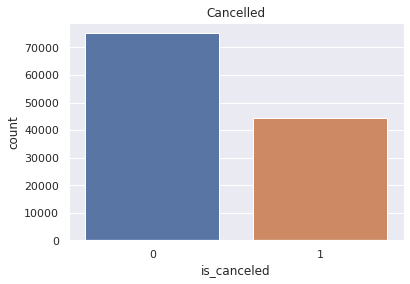

In [ ]:
sns.countplot(data=df_hotels, x='is_canceled')
plt.title('Cancelled')
plt.show()

Ternyata terdapat lumayan banyak pengunjung yang membatalkan reservasi, hingga 37% dari seluruh pengunjung.



## Nomor 3 (Cancelled bookings by hotel)

A. Untuk "City Hotel", berapa persen reservasi yang dibatalkan?

B. Untuk "Resort Hotel", berapa persen reservasi yang dibatalkan?



In [ ]:
df_hotels.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

### Slice data

In [ ]:
# mencari row mana saja yang isi kolom hotel nya sama dengan 'City Hotel'
filter_cityhotel = df_hotels.hotel=='City Hotel'
filter_cityhotel

0         False
1         False
2         False
3         False
4         False
          ...  
119385     True
119386     True
119387     True
119388     True
119389     True
Name: hotel, Length: 119390, dtype: bool

In [ ]:
# menampilkan dataframe df_hotels yang row nya nilai filter_cityhotel nya sama dengan True
# dengan kata lain, menampilkan dataframe df_hotels yang nilai kolom hotel nya = 'City Hotel'
df_hotels[filter_cityhotel]

,id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,40060,City Hotel,0,6,2015,July,27,1,0,2,...,No Deposit,6.0,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-03
40061,40061,City Hotel,1,88,2015,July,27,1,0,4,...,No Deposit,9.0,NaN,0,Transient,76.50,0,1,Canceled,2015-07-01
40062,40062,City Hotel,1,65,2015,July,27,1,0,4,...,No Deposit,9.0,NaN,0,Transient,68.00,0,1,Canceled,2015-04-30
40063,40063,City Hotel,1,92,2015,July,27,1,2,4,...,No Deposit,9.0,NaN,0,Transient,76.50,0,2,Canceled,2015-06-23
40064,40064,City Hotel,1,100,2015,July,27,2,0,2,...,No Deposit,9.0,NaN,0,Transient,76.50,0,1,Canceled,2015-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,119385,City Hotel,0,23,2017,August,35,30,2,5,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,119386,City Hotel,0,102,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,119387,City Hotel,0,34,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,119388,City Hotel,0,109,2017,August,35,31,2,5,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


`df_hotels[df_hotels.hotel=='City Hotel']` dan `df_hotels[filter_cityhotel]` itu sama

In [ ]:
# menampilkan total row dalam persen dengan parameter normalize=True
df_hotels[df_hotels.hotel=='City Hotel'].is_canceled.value_counts(normalize=True)

0    0.58273
1    0.41727
Name: is_canceled, dtype: float64

In [ ]:
filter_city_cancel = (df_hotels.hotel=='City Hotel') & (df_hotels.is_canceled==1)
filter_city_cancel

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool

In [ ]:
# mereturn baris data di df_hotels yang memenuhi kondisi filter_city_cancel
# (yaitu yghotel yg jenisnya City Hotel dan cancelled)
df_hotels[filter_city_cancel]

,id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40061,40061,City Hotel,1,88,2015,July,27,1,0,4,...,No Deposit,9.0,NaN,0,Transient,76.5,0,1,Canceled,2015-07-01
40062,40062,City Hotel,1,65,2015,July,27,1,0,4,...,No Deposit,9.0,NaN,0,Transient,68.0,0,1,Canceled,2015-04-30
40063,40063,City Hotel,1,92,2015,July,27,1,2,4,...,No Deposit,9.0,NaN,0,Transient,76.5,0,2,Canceled,2015-06-23
40064,40064,City Hotel,1,100,2015,July,27,2,0,2,...,No Deposit,9.0,NaN,0,Transient,76.5,0,1,Canceled,2015-04-02
40065,40065,City Hotel,1,79,2015,July,27,2,0,3,...,No Deposit,9.0,NaN,0,Transient,76.5,0,1,Canceled,2015-06-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110280,110280,City Hotel,1,132,2017,April,17,25,0,0,...,No Deposit,9.0,NaN,0,Transient,0.0,0,3,Canceled,2017-04-25
111355,111355,City Hotel,1,4,2017,June,23,5,1,0,...,No Deposit,NaN,238.0,0,Transient,65.0,0,0,Canceled,2017-06-05
111924,111924,City Hotel,1,7,2017,May,22,31,0,1,...,No Deposit,NaN,238.0,0,Transient,65.0,0,0,Canceled,2017-05-31
111925,111925,City Hotel,1,6,2017,July,29,17,1,0,...,No Deposit,NaN,238.0,0,Transient,65.0,0,0,No-Show,2017-07-17


In [ ]:
len(df_hotels[filter_city_cancel])

33102

In [ ]:
df_hotels[filter_city_cancel].shape

(33102, 33)

In [ ]:
df_hotels[filter_city_cancel].shape[0]

33102

In [ ]:
len(df_hotels[(df_hotels.hotel=='City Hotel')&(df_hotels.is_canceled==1)]) / len(df_hotels[(df_hotels.hotel=='City Hotel')])

0.41726963317786464

In [ ]:
df_hotels[df_hotels.hotel=='Resort Hotel'].is_canceled.value_counts(normalize=True)

0    0.722366
1    0.277634
Name: is_canceled, dtype: float64

In [ ]:
len(df_hotels[(df_hotels.hotel=='Resort Hotel')&(df_hotels.is_canceled==1)]) / len(df_hotels[(df_hotels.hotel=='Resort Hotel')])

0.27763354967548676

Di hotel jenis apa ditemukan proposi reservasi yang dibatalkan lebih besar?

### Group by

SQL:
```
select
  jenis_hotel, -- tidak diagregasi
  is_canceled, -- tidak diagregasi
  count(distinct id) as total_booking -- ada agregasi
from tabel_hotel
group by jenis_hotel, is_canceled
```

di pandas:

`df.groupby([kolom dasar agregasi])[kolom yg akan diagregat].jenis_agregasi()`

di SQL, `kolom dasar agregasi` adalah yang muncul di klausa `GROUP BY`

kode SQL di atas sama dengan:
`df_hotels.groupby(['hotel','is_canceled'])['id'].nunique()`



In [ ]:
df_hotels.groupby('hotel')['id'].nunique()

hotel
City Hotel      79330
Resort Hotel    40060
Name: id, dtype: int64

In [ ]:
df_hotels.groupby(['hotel'])['id'].nunique()

hotel
City Hotel      79330
Resort Hotel    40060
Name: id, dtype: int64

kode di bawah sama dengan kode SQL ini:

```
SELECT
  hotel,
  is_canceled,
  COUNT(*)
FROM df_hotels
GROUP BY hotel, is_canceled
```

In [ ]:
# ingin mengetahui jumlah baris data berdasarkan hotel dan is_canceled
df_hotels.groupby(['hotel','is_canceled']).size()

hotel         is_canceled
City Hotel    0              46228
              1              33102
Resort Hotel  0              28938
              1              11122
dtype: int64

kode di bawah sama dengan kode SQL ini:

```
SELECT
  hotel,
  is_canceled,
  COUNT(DISTINCT id)
FROM df_hotels
GROUP BY hotel, is_canceled
```

In [ ]:
df_hotels.groupby(['hotel','is_canceled'])['id'].nunique()

hotel         is_canceled
City Hotel    0              46228
              1              33102
Resort Hotel  0              28938
              1              11122
Name: id, dtype: int64

rata-rata ADR dari tiap jenis hotel dan tiap jenis booking (berdasarkan jenis cancellation)

- ADR -> diagregasi, dengan dihitung rata-rata
- agregasi dilakukan berdasarkan group apa? -> jenis hotel, jenis booking

In [ ]:
df_hotels.groupby(['hotel','is_canceled'])['adr'].mean()

hotel         is_canceled
City Hotel    0              105.745948
              1              104.687920
Resort Hotel  0               90.788971
              1              105.787010
Name: adr, dtype: float64

In [ ]:
type(df_hotels.groupby(['hotel','is_canceled'])['adr'].mean())

pandas.core.series.Series

dengan parameter `as_index=False`, groupby akan me-return hasil groupingnya sebagai dataframe

In [ ]:
df_hotels.groupby(['hotel','is_canceled'], as_index=False)['adr'].mean()

,hotel,is_canceled,adr
0,City Hotel,0,105.745948
1,City Hotel,1,104.687920
2,Resort Hotel,0,90.788971
3,Resort Hotel,1,105.787010


In [ ]:
type(df_hotels.groupby(['hotel','is_canceled'], as_index=False)['adr'].mean())

pandas.core.frame.DataFrame

In [ ]:
df_hotels.groupby(['hotel'])['id'].nunique().reset_index()

,hotel,id
0,City Hotel,79330
1,Resort Hotel,40060


In [ ]:
df_hotels.groupby(['hotel'])['id'].nunique().to_frame()

,id
hotel,
City Hotel,79330
Resort Hotel,40060


In [ ]:
df_hotels.groupby(['hotel'])['id'].nunique().to_frame().reset_index()

,hotel,id
0,City Hotel,79330
1,Resort Hotel,40060


### Fungsi Agg: cara lain melakukan agregasi selain Groupby yg biasa

Dengan Groupby yang biasa kita bisa melakukan agregasi tapi hanya untuk satu kolom saja

In [ ]:
df_hotels.columns

Index(['id', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
dictionary_agregasi = {'id':'nunique',
                       'customer_type':'nunique',
                       'adults':['mean','max']}

dengan menggunakan method `agg` kita bisa melakukan
- grouping untuk lebih dari satu kolom
- grouping dengan lebih dari 1 jenis agregasi 

In [ ]:
df_hotels.groupby(['hotel']).agg(dictionary_agregasi)

id customer_type    adults    
             nunique       nunique      mean max
hotel                                           
City Hotel     79330             4  1.850977   4
Resort Hotel   40060             4  1.867149  55

In [ ]:
df_hotels.groupby(['hotel']).agg({'id':'nunique',
                                  'customer_type':'nunique',
                                  'adults':['mean','max']}).reset_index()

hotel      id customer_type    adults    
                nunique       nunique      mean max
0    City Hotel   79330             4  1.850977   4
1  Resort Hotel   40060             4  1.867149  55

## Nomor 4 (Filter)

Lakukan filter sehingga hanya menampilkan data pengunjung yang tidak membatalkan reservasi. Dan **simpan hasilnya** dalam variabel `df_checkout`.

In [ ]:
df_hotels.shape

(119390, 33)

In [ ]:
df_hotels[df_hotels.is_canceled==0]

,id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,119385,City Hotel,0,23,2017,August,35,30,2,5,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,119386,City Hotel,0,102,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,119387,City Hotel,0,34,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,119388,City Hotel,0,109,2017,August,35,31,2,5,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
df_checkout = df_hotels[df_hotels.is_canceled==0]
df_checkout.shape

(75166, 33)

In [ ]:
df_hotels.shape

(119390, 33)

## Nomor 5 (Total bookings by arrival month)

A. Tampilkan jumlah reservasi tiap bulan kedatangan untuk masing-masing jenis hotel. 

B. Lalu di bulan apa terdapat reservasi yang paling banyak di masing-masing jenis hotel? **Buatlah kesimpulan** apakah trennya sama di kedua jenis hotel?

C. Lakukan seperti point B namun dengan nama bulan yang sudah di-mapping menjadi bulan dalam angka

**> (!) Untuk pertanyaan ini dan selanjutnya akan menggunakan dataframe `df_checkout`**

In [ ]:
# menggunakan list comprehension buat tahu kolom mana saja yang mengandung kata 'arrival'
[i for i in df_checkout.columns if 'arrival' in i]

['arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month']

In [ ]:
df_checkout.arrival_date_month.unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [ ]:
df_checkout.arrival_date_year.value_counts()

2016    36370
2017    24942
2015    13854
Name: arrival_date_year, dtype: int64

pakai backslash (`\`) untuk pindah ke line baru (line break)

In [ ]:
df_checkout.groupby(['hotel','arrival_date_month'], as_index=False).size()
.sort_values(['hotel','size'])

SyntaxError: ignored

In [ ]:
df_checkout.groupby(['hotel','arrival_date_month'], as_index=False).size()\
.sort_values(['hotel','size'])

In [ ]:
df_checkout.groupby(['hotel','arrival_date_month'], as_index=False).size()\
.sort_values(['hotel','size'], ascending=[True,False])

In [ ]:
# mengurutkan berdasarkan jenis hotel dan jumlah booking paling banyak
df_checkout.groupby(['hotel','arrival_date_month'],as_index=False).size()\
.sort_values(by=['hotel','size'],ascending=[True,False])

In [ ]:
df_checkout.groupby(['hotel','arrival_date_month'])['id'].nunique()

Melakukan mapping nama bulan menjadi bulan dalam angka

In [ ]:
import calendar

month_dict = {month: index for index, month in enumerate(calendar.month_name) if month}
month_dict

In [ ]:
# bikin dictionary sendiri
month_dict_manual = {'January': 1,
                     'February': 2,
                      'March': 3,
                      'April': 4,
                      'May': 5,
                      'June': 6,
                      'July': 7,
                      'August': 8,
                      'September': 9,
                      'October': 10,
                      'November': 11,
                      'December': 12}
month_dict_manual

In [ ]:
# isi calendar.month_name adalah nama-nama bulan sesuai dengan urutannya di kalender (January -> December),
# bukan urutan abjad
for i in calendar.month_name:
  print(i)

In [ ]:
df_checkout['arrival_date_month']

In [ ]:
# isian df_checkout kolom arrival_date_month di posisi 0
df_checkout['arrival_date_month'][0]

In [ ]:
month_dict[df_checkout['arrival_date_month'][0]]

In [ ]:
month_dict['July']

In [ ]:
# melakukan mapping tiap value yang ada di dalam kolom arrival_date_month menjadi angka bulan
df_checkout['arrival_date_month'].map(month_dict)

In [ ]:
# membuat kolom baru bernama arrival_date_month_num untuk menyimpan nilai angka bulan
# di langkah ini, tiap baris dari kolom arrival_date_month yang berisi nama bulan akan di-mapping ke angka yang sesuai
df_checkout['arrival_date_month_num'] = df_checkout['arrival_date_month'].map(month_dict)

In [ ]:
df_checkout.groupby(['hotel','arrival_date_month_num']).size()

In [ ]:
sns.countplot(data=df_checkout, x='arrival_date_month_num')

In [ ]:
sns.countplot(data=df_checkout, x='arrival_date_month_num',hue='hotel')
plt.xlabel('bulan kedatangan')
plt.ylabel('jumlah reservasi')
plt.show()

## Nomor 6 (arrival_date)

A. Buat sebuah kolom baru bernama `arrival_date` yang berisi info lengkap tentang tahun, bulan, dan tanggal kedatangan. 

B. Ubah kolom menjadi tipe datetime.

Hint: gabungkan tahun, bulan, dan tanggal menjadi format `yyyy-mm-dd`

In [ ]:
[i for i in df_checkout.columns if 'arrival' in i]

In [ ]:
# mengambil subset dataframe df_checkout untuk kolom2 yg ada nama 'arrival' nya
df_checkout[[i for i in df_checkout.columns if 'arrival' in i]]

seperti fungsi `CONCATENATE` di google sheets atau excel

In [ ]:
df_checkout['arrival_date_year'].dtype

In [ ]:
df_checkout['arrival_date_year'].astype('str')+ '-' +\
 df_checkout['arrival_date_month_num'].astype('str') + '-' + df_checkout['arrival_date_day_of_month'].astype('str')

In [ ]:
df_checkout.arrival_date_month_num.dtype

In [ ]:
# langkah 1: mengubah kolom arrival_date_month_num menjadi string
df_checkout.arrival_date_month_num.astype('str')

kita bisa menggunakan method `str.pad` yang bisa kita gunakan untuk Series dengan tipe data string, makanya kita harus mengubah dulu Series/kolom tsb jadi string dengan `astype('str')`

In [ ]:
# langkah 1: mengubah kolom arrival_date_month_num menjadi string
# langkah 2: lalu menambahkan zero padding, sehingga '1' menjadi '01' --> langkah 2 di-chain dengan langkah 1
df_checkout.arrival_date_month_num.astype('str').str.pad(2,fillchar='0')

In [ ]:
df_checkout.arrival_date_month_num.astype('str').str.pad(5,fillchar='0')

melakukan concatenate tapi untuk value yang sudah ditambah padding angka 0 di depan

In [ ]:
df_checkout['arrival_date_year'].astype('str') + '-' +\
 df_checkout.arrival_date_month_num.astype('str').str.pad(2,fillchar='0') + '-' +\
 df_checkout.arrival_date_day_of_month.astype('str').str.pad(2,fillchar='0')

In [ ]:
df_checkout['arrival_date'] = \
    df_checkout['arrival_date_year'].astype('str') + '-' +\
    df_checkout.arrival_date_month_num.astype('str').str.pad(2,fillchar='0') + '-' +\
    df_checkout.arrival_date_day_of_month.astype('str').str.pad(2,fillchar='0')

In [ ]:
df_checkout['arrival_date']

In [ ]:
df_checkout.arrival_date.dtype

In [ ]:
# ubah arrival_date dari string menjadi datetime 
# value yg ada di arrival_date akan diganti dengan yang sudah dalam tipe data datetime
df_checkout['arrival_date'] = pd.to_datetime(df_checkout.arrival_date)
df_checkout['arrival_date']

In [ ]:
df_checkout.arrival_date.dtype

## Nomor 7 (Time-series data)

Mari kita bermain dengan time-series data menggunakan kolom `arrival_date`. Buat 2 dataframe yang menunjukkan sbb:
1. total reservasi harian (`df_reservasi_perhari`)
2. rata-rata reservasi harian di tiap minggu (`df_avg_reservasi_harian`)

> **(!) Stop and think!**

> Apa perbedaan data yang ditunjukkan oleh `df_reservasi_perhari` dan `df_avg_reservasi_harian`?

In [ ]:
df_checkout.arrival_date.describe()

dengan `resample` semacam melakukan groupby tapi untuk tipe data datetime

In [ ]:
df_checkout.resample('D',on='arrival_date')['id'].nunique()

df_checkout.groupby(['arrival_date']).id.nunique() --> bisa dipakai langsung jika agregasinya di level harian (Daily) karena datanya sudah daily

tapi kalo misal kita ingin agregasi di level bulan-tahun --> ga bisa langsung pakai groupby, karena data arrival_date yg tersedia itu di level harian

In [ ]:
df_checkout.resample('M',on='arrival_date')['id'].nunique().head(20)

In [ ]:
df_checkout.set_index('arrival_date').groupby([pd.Grouper(freq='D'),'hotel']).agg({'adr':'mean','id':'nunique'}).reset_index()

In [ ]:
df_reservasi_perhari = df_checkout.resample('D',on='arrival_date').size().reset_index().rename(columns={0:'total_reservasi'})
df_reservasi_perhari.head(14)

In [ ]:
df_reservasi_perhari.head(5).total_reservasi.mean()

In [ ]:
df_checkout.resample('D',on='arrival_date').size().reset_index().rename(columns={0:'total_reservasi'})\
.resample('W', on='arrival_date').mean()

In [ ]:
df_checkout.resample('D',on='arrival_date').size().reset_index().rename(columns={0:'total_reservasi'}).\
resample('W',on='arrival_date')['total_reservasi'].mean()

In [ ]:
df_avg_reservasi_harian = df_checkout.resample('D',on='arrival_date').size().reset_index().rename(columns={0:'total_reservasi'}).\
resample('W',on='arrival_date')['total_reservasi'].mean().reset_index()
df_avg_reservasi_harian

In [ ]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df_reservasi_perhari, x='arrival_date', y='total_reservasi')
plt.title('Reservasi Harian', fontsize='x-large')
plt.show()

In [ ]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df_avg_reservasi_harian, x='arrival_date', y='total_reservasi')
plt.title('Rata-Rata Reservasi Harian', fontsize='x-large')
plt.show()

### Resample di SQL

Resample dari sebuah data dengan tipe datetime adalah seperti melakukan GROUP BY dengan DATE_TRUNC (mengubah frekuensi datetime)
```
SELECT
  DATE_TRUNC('month',arrival_date) as bulan_kedatangan,
  COUNT(DISTINCT id) AS total_kedatangan
FROM tabel_hotel
GROUP BY 1
```

In [ ]:
# mencari rata-rata ADR di tiap bulan dengan parameter frequency = 'M'
df_checkout.resample('M',on='arrival_date')['adr'].mean()

### Kapan menggunakan [] dan () ?

Seperti di list, ketika kita ingin melakukan slicing kita pakai []. Begitu juga ketika kita bermain dengan dataframe.

In [ ]:
sebuah_list = ['lala','yeye','lolo']
sebuah_list[1]

In [ ]:
# melakukan slicing, dengan hanya mengeluarkan row yang isi kolom hotel nya sama dengan 'City Hotel'
df_checkout[(df_checkout.hotel=='City Hotel')]

In [ ]:
# hanya mengeluarkan indikasi apakah tiap-tiap row memenuhi sebuah kondisi tertentu,
# yaitu kondisi dimana isi kolom hotel nya sama dengan 'City Hotel'
df_checkout.hotel=='City Hotel'

In [ ]:
# jika hanya ada 1 kondisi (hotel sama dengan 'City Hotel'), maka tidak perlu tanda kurung sbb: (kondisi)
# kode di bawah ini sama dengan: df_checkout[(df_checkout.hotel=='City Hotel')]
df_checkout[df_checkout.hotel=='City Hotel']

In [ ]:
(df_checkout.hotel=='City Hotel') & (df_checkout.arrival_date_month=='July')

### Filter dengan lebih dari 1 kondisi
jika ada lebih dari 1 kondisi, misal:
- kondisi 1: hotel sama dengan 'City Hotel'
- kondisi 2: arrival_date_month sama dengan 'July'

maka diperlukan tanda kurung di tiap kondisi, sebelum satukan oleh operator
sehingga bisa ditulis sbb:

- kondisi_1 dan kondisi_2 harus dipenuhi (logika matematika DAN): `(kondisi_1) & (kondisi_2)`
- hanya salah satu kondisi harus dipenuhi (logika matematika ATAU): `(kondisi_1) | (kondisi_2)`

In [ ]:
# ga akan bisa jalan, karena pakai 2 kondisi jadi musti dimasukkan ke dalam tanda kurung (kondisi)
df_checkout[df_checkout.hotel=='City Hotel' & df_checkout.arrival_date_month=='July']

In [ ]:
df_checkout[(df_checkout.hotel=='City Hotel') & (df_checkout.arrival_date_month=='July')]

### Kapan pakai filter biasa, kapan pakai loc dan iloc?

Cara-cara filter/slice data frame
1. pakai `df[sebuah_filter_row]` -- filter biasa
2. pakai `df.loc[sebuah_filter_row, sebuah_filter_kolom]`
3. pakai iloc -> musti pake index angka (relatif lebih ribet krn musti tahu index angkanya)

> (!) Pakai yg mana? Yang paling mudah dipakai dan diingat aja, yang penting kita ga ribet pakenya karena yg dilakukan itu sama-sama filtering/slicing

`df.loc[filter buat rows, filter buat kolom]`


`df_checkout.loc[(df_checkout.hotel=='City Hotel') & (df_checkout.arrival_date_month=='July')]`

sama dengan 

`df_checkout[(df_checkout.hotel=='City Hotel') & (df_checkout.arrival_date_month=='July')]`

In [ ]:
# mereturn semua baris yang memenuhi kriteria kondisi 1 dan 2, serta mereturn semua kolom
df_checkout.loc[(df_checkout.hotel=='City Hotel') & (df_checkout.arrival_date_month=='July')]

In [ ]:
df_checkout.loc[(df_checkout.hotel=='City Hotel') & (df_checkout.arrival_date_month=='July'), ['arrival_date_week_number','lead_time']]

In [ ]:
df_checkout[(df_checkout.hotel=='City Hotel') & (df_checkout.arrival_date_month=='July')][['arrival_date_week_number','lead_time']]

In [ ]:
list_1 = np.arange(0,20,2)
list_2 = np.arange(20,40,2)
contoh_df = pd.DataFrame(data=zip(list_1,list_2),
                         columns=['kolom_1','kolom_2'])
contoh_df

In [ ]:
contoh_df['flagging_angka'] = ''

In [ ]:
contoh_df[contoh_df.kolom_2>=30]

dengan menggunakan `loc` kita bisa melakukan assignment/mengubah data khusus untuk baris tertentu yang memenuhi kriteria yg dimasukkan ke dalam `loc`

In [ ]:
contoh_df.loc[contoh_df.kolom_2>=30, 'flagging_angka'] = 'lebih dari 30'
contoh_df

## Nomor 8 (ADR)

A. Berapa rata-rata ADR berdasarkan jenis hotel dan jenis customer (`customer_type`)? 

B. Jenis customer mana yang memiliki ADR paling besar di masing-masing jenis hotel?

In [ ]:
df_checkout.groupby(['hotel','customer_type'])['adr'].mean()

In [ ]:
df_checkout.groupby(['hotel','customer_type'])['adr'].median()

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_checkout, x='adr', y='hotel',hue='customer_type')
plt.show()

## Nomor 9 (BONUS) (Total bookings by country name)

Dengan menggunakan dataframe `df_country` yang berisi informasi nama negara dan kode negaranya, 
**Tampilkan** 10 negara dengan jumlah booking terbesar!

Langkah:
1. Gabungkan dataframe `df_checkout` dan `df_country`. Gunakan kolom `Alpha-3 code` untuk mendapatkan nama negara.
2. Tampilkan 10 negara (dengan namanya, bukan kode negara) dengan jumlah booking terbesar

In [ ]:
df_checkout.country

In [ ]:
df_country = pd.read_csv('https://gist.githubusercontent.com/tadast/8827699/raw/f5cac3d42d16b78348610fc4ec301e9234f82821/countries_codes_and_coordinates.csv')
df_country.head()

> **(!) Stop and think!**

> 1. Apakah kita bisa langsung menggunakan kolom `Alpha-3 code` sebagai join key dengan dataset hotel kita?

> 2. Apakah semua kode negara yang ada di kolom `country` dataset hotel kita bisa ditemukan di `df_country`?

In [ ]:
df_country['Alpha-3 code'].str.replace('"','')

In [ ]:
df_country['Alpha-3 code'].str.replace('"','').str.len()

In [ ]:
# menghilangkan spasi di awal dan akhir
df_country['code'] = df_country['Alpha-3 code'].str.replace('"','').str.strip()

In [ ]:
df_merged = pd.merge(df_checkout[['id','country']],
                     df_country[['Country','code']],
                     left_on='country',
                     right_on='code',
                     indicator=True,
                     how='left')
df_merged.head()

In [ ]:
df_merged._merge.value_counts()

Mengecek berapa banyak row data kita yang bisa di-merge dengan `df_country`

In [ ]:
df_merged._merge.value_counts()

In [ ]:
df_merged[df_merged._merge=='left_only']['country'].unique()

In [ ]:
set(df_checkout.country) - set(df_country['code'])

In [ ]:
df_checkout.country.value_counts().head(10)

Didapatkan bahwa hanya ada 3 `country` yang tidak bisa di-map ke `df_country`, dan ketiga negara tersebut tidak ada di Top 10 negara asal booking, sehingga cukup bagi kita menggunakan `df_merged`.

In [ ]:
df_merged.Country.value_counts().head(10)

In [ ]:
df_merged.Country.value_counts().head(10).sort_values(ascending=True).plot.barh()
plt.show()

## Nomor 10 (BONUS) (Total guests)
A. Berapa banyak tamu yang menginap untuk tiap reservasi? 

B. Berdasarkan dataset, berapa jumlah tamu paling banyak? Tampilkan juga baris data reservasi yang memiliki jumlah tamu paling banyak.

In [ ]:
df_checkout.columns

In [ ]:
df_checkout['total_guest'] = df_checkout.adults + df_checkout.children + df_checkout.babies

In [ ]:
df_checkout.total_guest.describe()

In [ ]:
df_checkout.market_segment.describe()

In [ ]:
df_checkout.total_guest.max()

In [ ]:
df_checkout['total_guest'].max()

In [ ]:
df_checkout[df_checkout.total_guest==df_checkout.total_guest.max()].T

In [ ]:
df_country.columns

### Jika ingin mengakses/mereturn sebuah kolom, kapan pakai kurung siku (`[sebuah_kolom]`), kapan pakai tanda titik (`.`)?

hasil dari `df_checkout.total_guest.max()` dan `df_checkout['total_guest'].max()` sama saja

> Lantas kapan pakai tanda siku dan kapan pakai tanda titik?

- pakai tanda titik paling mudah diingat dan diketik. misal: `df_checkout.hotel`
- tanda titik **tidak bisa dipakai** kalau nama kolomnya mengandung **spasi**
- untuk nama kolom yg mengandung spasi, hanya bisa pakai tanda kurung siku. misal: `df_country['Alpha-3 code']`

In [ ]:
df_country['Alpha-3 code']

In [ ]:
# tidak bisa dipanggil pakai titik kalo ada spasi di nama kolom
df_country.Alpha-3 code

## Referensi tambahan

1. [Perbedaan TO (Tour Operator) dan TA (Travel Agent)](https://traveltourismindonesia.wordpress.com/2008/09/11/bedanya-travel-agent-dan-tour-operator/)
2. [Kenapa penting untuk bisa memprediksi cancellation di sebuah bisnis hotel?](https://www.researchgate.net/publication/310504011_Predicting_Hotel_Booking_Cancellation_to_Decrease_Uncertainty_and_Increase_Revenue)
3. [Grouping date ranges in pandas time series using resample](https://calmcode.io/pandas-datetime/resample.html)